# Importing necessary libraries

In [8]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

## Predicting the values of stock prices using SVM models and comparing their results.

In [2]:
meta_for_svm = '/kaggle/input/meta-stocks/Meta_1M.csv'
df = pd.read_csv(meta_for_svm)
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/02/2025,$583.93,13470780,$574.91,$592.66,$573.36
1,04/01/2025,$586.00,12836570,$570.84,$589.91,$570.00
2,03/31/2025,$576.36,21124680,$563.50,$578.70,$553.30
3,03/28/2025,$576.74,17602820,$600.31,$601.75,$573.92
4,03/27/2025,$602.58,10436520,$602.00,$614.25,$600.10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        23 non-null     object
 1   Close/Last  23 non-null     object
 2   Volume      23 non-null     int64 
 3   Open        23 non-null     object
 4   High        23 non-null     object
 5   Low         23 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.2+ KB


In [4]:
# Preprocess the DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days  # Continuous day index starting from 0
df['Close/Last'] = pd.to_numeric(df['Close/Last'].replace('[\$,]', '', regex=True), errors='coerce')  # Convert price to float

In [5]:
df.head()

,Date,Close/Last,Volume,Open,High,Low,Days_Since_Start
0,2025-04-02,583.93,13470780,$574.91,$592.66,$573.36,30
1,2025-04-01,586.00,12836570,$570.84,$589.91,$570.00,29
2,2025-03-31,576.36,21124680,$563.50,$578.70,$553.30,28
3,2025-03-28,576.74,17602820,$600.31,$601.75,$573.92,25
4,2025-03-27,602.58,10436520,$602.00,$614.25,$600.10,24


In [6]:
# Extract dates and prices as lists
dates = df['Days_Since_Start'].tolist()  # Use days since March 3, 2025
prices = df['Close/Last'].tolist()

Days Since Start: [30, 29, 28, 25, 24, 23, 22, 21, 18, 17, 16, 15, 14, 11, 10, 9, 8, 7, 4, 3, 2, 1, 0]
Prices (Close/Last): [583.93, 586.0, 576.36, 576.74, 602.58, 610.98, 626.31, 618.85, 596.25, 586.0, 584.06, 582.36, 604.9, 607.6, 590.64, 619.56, 605.71, 597.99, 625.66, 627.93, 656.47, 640.0, 655.05]


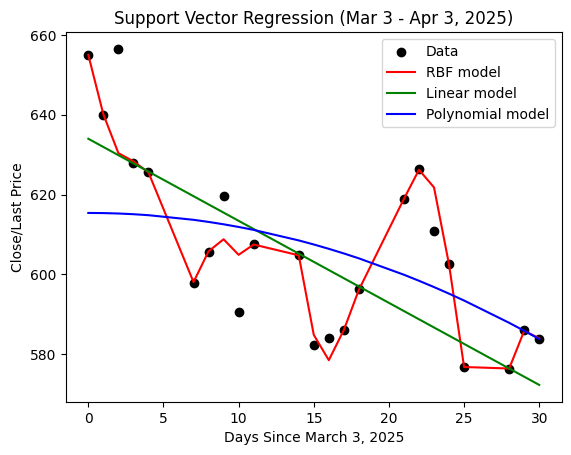


The stock close price for day 28 (March 31, 2025) is: (576.4605524483143, 576.4599999999743, 587.8998304811277)
RBF kernel: $ 576.4605524483143
Linear kernel: $ 576.4599999999743
Polynomial kernel: $ 587.8998304811277


In [9]:
# Function to predict price
def predict_price(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))  # Convert to matrix of n x 1

    # Define SVR models
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3, gamma='auto')
    svr_poly = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')

    # Fit the models
    svr_rbf.fit(dates, prices)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)

    # Plotting
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='Polynomial model')
    plt.xlabel('Days Since March 3, 2025')
    plt.ylabel('Close/Last Price')
    plt.title('Support Vector Regression (Mar 3 - Apr 3, 2025)')
    plt.legend()
    plt.show()

    # Return predictions for the input day (x)
    return (svr_rbf.predict(np.array(x).reshape(-1, 1))[0],
            svr_lin.predict(np.array(x).reshape(-1, 1))[0],
            svr_poly.predict(np.array(x).reshape(-1, 1))[0])

# Print the data
print("Days Since Start:", dates)
print("Prices (Close/Last):", prices)

# Predict price for a specific day (e.g., day 28, which is March 31, 2025)
predicted_price = predict_price(dates, prices, 28)
print("\nThe stock close price for day 28 (March 31, 2025) is:", predicted_price)
print("RBF kernel: $", str(predicted_price[0]))
print("Linear kernel: $", str(predicted_price[1]))
print("Polynomial kernel: $", str(predicted_price[2]))

# Creating a LSTM model for stock price prediction model.

Introducing datasets.

In [10]:
Meta_stocks = '/kaggle/input/meta-stocks/Meta_1Y.csv'
dataset = pd.read_csv(Meta_stocks)
dataset

,Date,Close/Last,Volume,Open,High,Low
0,04/02/2025,$583.93,13470780,$574.91,$592.66,$573.36
1,04/01/2025,$586.00,12836570,$570.84,$589.91,$570.00
2,03/31/2025,$576.36,21124680,$563.50,$578.70,$553.30
3,03/28/2025,$576.74,17602820,$600.31,$601.75,$573.92
4,03/27/2025,$602.58,10436520,$602.00,$614.25,$600.10
...,...,...,...,...,...,...
246,04/09/2024,$516.90,10881450,$522.23,$525.87,$506.74
247,04/08/2024,$519.25,13260580,$529.28,$531.4899,$518.89
248,04/05/2024,$527.34,19263270,$516.855,$530.70,$514.4099
249,04/04/2024,$510.92,26476250,$516.42,$530.00,$510.58


## Creating DataFrame and preprocessing the data.

In [11]:
df = dataset[['Date', 'Close/Last']]

df

,Date,Close/Last
0,04/02/2025,$583.93
1,04/01/2025,$586.00
2,03/31/2025,$576.36
3,03/28/2025,$576.74
4,03/27/2025,$602.58
...,...,...
246,04/09/2024,$516.90
247,04/08/2024,$519.25
248,04/05/2024,$527.34
249,04/04/2024,$510.92


Making a function to change date type from 'object' to 'datetime'.

In [12]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('04/25/2021')
datetime_object

datetime.datetime(2021, 4, 25, 0, 0)

Applying the function on date column

In [13]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']
df['Close/Last'] = pd.to_numeric(df['Close/Last'].replace('[\$,]', '', regex=True), errors='coerce')

<ipython-input-13-a636220a8bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)
<ipython-input-13-a636220a8bd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close/Last'] = pd.to_numeric(df['Close/Last'].replace('[\$,]', '', regex=True), errors='coerce')


Changing the index to date.

In [14]:
df.index = df.pop('Date')
df

,Close/Last
Date,
2025-04-02,583.93
2025-04-01,586.00
2025-03-31,576.36
2025-03-28,576.74
2025-03-27,602.58
...,...
2024-04-09,516.90
2024-04-08,519.25
2024-04-05,527.34


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2025-04-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


Plotting the value of stocks.

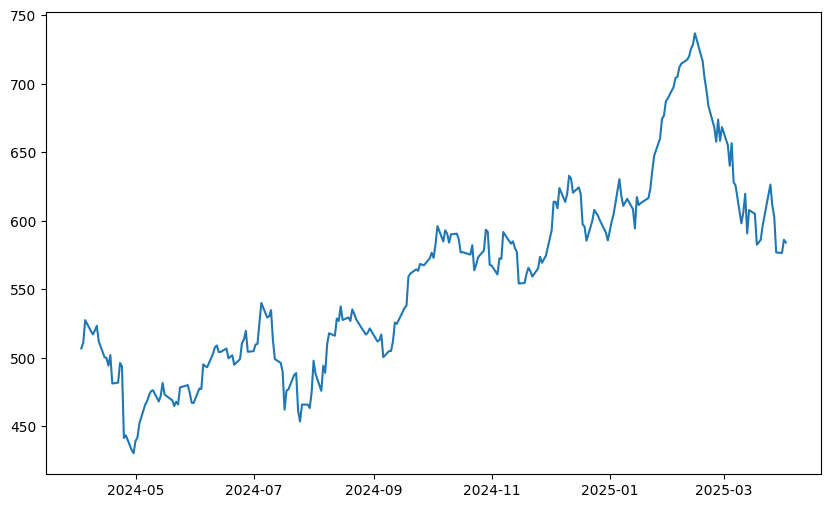

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(df.index, df['Close/Last'])

Creating a function to make windowed df that shows the relation between target date's stock's prices and stock prices three days before.

In [17]:
df = df.rename(columns={'Close/Last': 'target'})

# Add columns for previous days' closing values
df['target-1'] = df['target'].shift(-1)  # 1 day before
df['target-2'] = df['target'].shift(-2)  # 2 days before
df['target-3'] = df['target'].shift(-3)  # 3 days before

df['target_date'] = df.index
df = df.reset_index(drop=True)
df = df.dropna()
print(df)

     target  target-1  target-2  target-3 target_date
0    583.93    586.00    576.36    576.74  2025-04-02
1    586.00    576.36    576.74    602.58  2025-04-01
2    576.36    576.74    602.58    610.98  2025-03-31
3    576.74    602.58    610.98    626.31  2025-03-28
4    602.58    610.98    626.31    618.85  2025-03-27
..      ...       ...       ...       ...         ...
243  511.90    523.16    519.83    516.90  2024-04-12
244  523.16    519.83    516.90    519.25  2024-04-11
245  519.83    516.90    519.25    527.34  2024-04-10
246  516.90    519.25    527.34    510.92  2024-04-09
247  519.25    527.34    510.92    506.74  2024-04-08

[248 rows x 5 columns]


In [18]:
df = df.iloc[::-1].reset_index(drop=True)
df

,target,target-1,target-2,target-3,target_date
0,519.25,527.34,510.92,506.74,2024-04-08
1,516.90,519.25,527.34,510.92,2024-04-09
2,519.83,516.90,519.25,527.34,2024-04-10
3,523.16,519.83,516.90,519.25,2024-04-11
4,511.90,523.16,519.83,516.90,2024-04-12
...,...,...,...,...,...
243,602.58,610.98,626.31,618.85,2025-03-27
244,576.74,602.58,610.98,626.31,2025-03-28
245,576.36,576.74,602.58,610.98,2025-03-31
246,586.00,576.36,576.74,602.58,2025-04-01


Creating a function to get date, X, and Y values from windowed dataframe.

In [19]:
# Function to convert DataFrame to dates, X, y
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    # Extract dates (last column: target_date)
    dates = df_as_np[:, -1]

    # Extract features (columns 1 to 3: target-1, target-2, target-3)
    middle_matrix = df_as_np[:, 1:-1]  # Shape: (248, 3)
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))  # Shape: (248, 3, 1)

    # Extract target (first column: target)
    Y = df_as_np[:, 0]  # Shape: (248,)

    return dates, X.astype(np.float32), Y.astype(np.float32)

# Call the function
dates, X, y = windowed_df_to_date_X_y(df)

# Print shapes
print("Shapes:", dates.shape, X.shape, y.shape)

print("\nFirst few dates:", dates[:3])
print("First few X (features):\n", X[:3])
print("First few y (targets):", y[:3])

Shapes: (248,) (248, 3, 1) (248,)

First few dates: [Timestamp('2024-04-08 00:00:00') Timestamp('2024-04-09 00:00:00')
 Timestamp('2024-04-10 00:00:00')]
First few X (features):
 [[[527.34]
  [510.92]
  [506.74]]

 [[519.25]
  [527.34]
  [510.92]]

 [[516.9 ]
  [519.25]
  [527.34]]]
First few y (targets): [519.25 516.9  519.83]


# Splitting the dataset in training, validation and testing dataset and plotting it for visualisation.

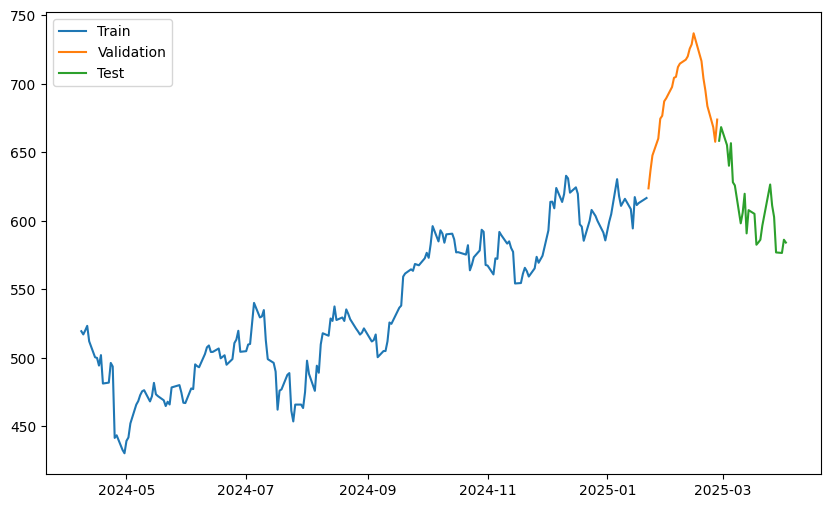

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize = (10,6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# Creating a LSTM neural network for price prediction.

In [27]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(264),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 292769.9062 - mean_absolute_error: 538.5119 - val_loss: 472959.5312 - val_mean_absolute_error: 687.1004
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 286290.7188 - mean_absolute_error: 532.4651 - val_loss: 467723.3125 - val_mean_absolute_error: 683.2793
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 277100.6250 - mean_absolute_error: 523.7525 - val_loss: 458991.1562 - val_mean_absolute_error: 676.8588
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 272557.1250 - mean_absolute_error: 519.6231 - val_loss: 444073.3125 - val_mean_absolute_error: 665.7464
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 255535.6875 - mean_absolute_error: 503.0140 - val_loss: 420407.2500 - val_mean_absolute_error: 647.7265
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 240034.7188 - mean_absolute_error: 487.0341 - val_loss: 385801.5938 - val_mean_absolute_error: 620.4373
Epoch 7/100
7/7 ━━━━━━━━━━━━

# Predicting values using model and plotting results.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


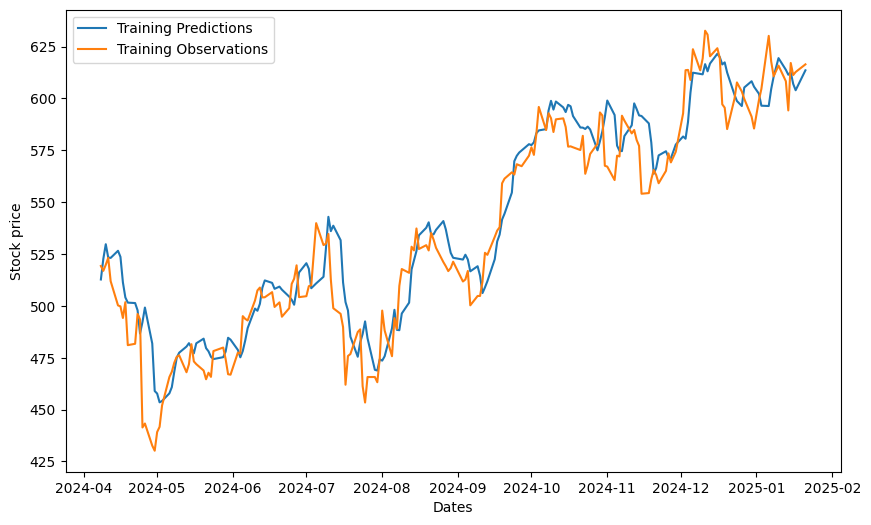

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize = (10,6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xlabel('Dates')
plt.ylabel('Stock price')
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


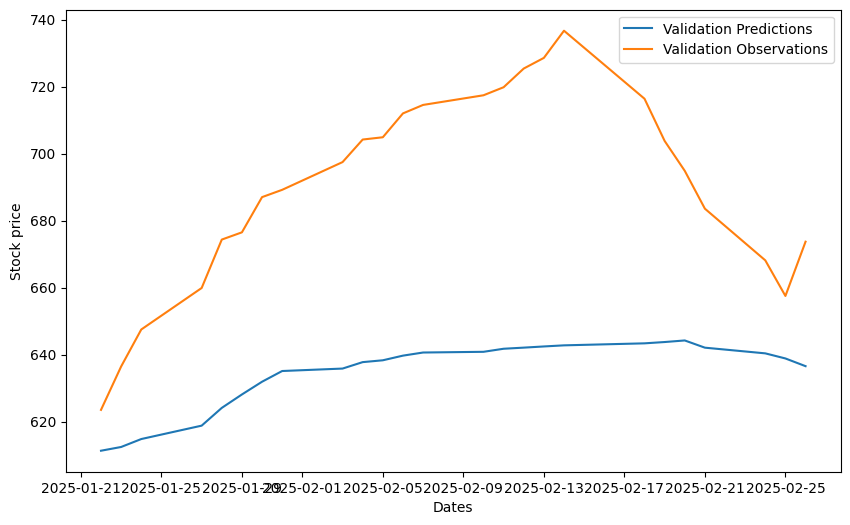

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize = (10,6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xlabel('Dates')
plt.ylabel('Stock price')
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


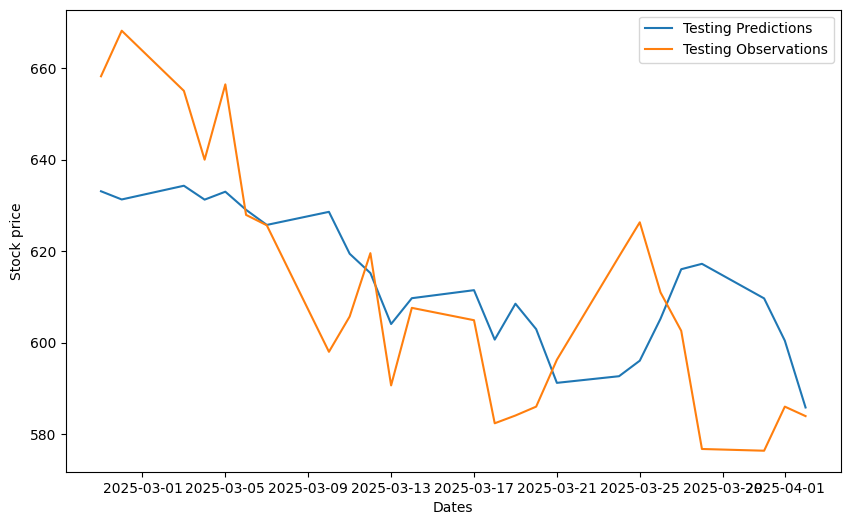

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize = (10,6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xlabel('Dates')
plt.ylabel('Stock price')
plt.legend(['Testing Predictions', 'Testing Observations'])

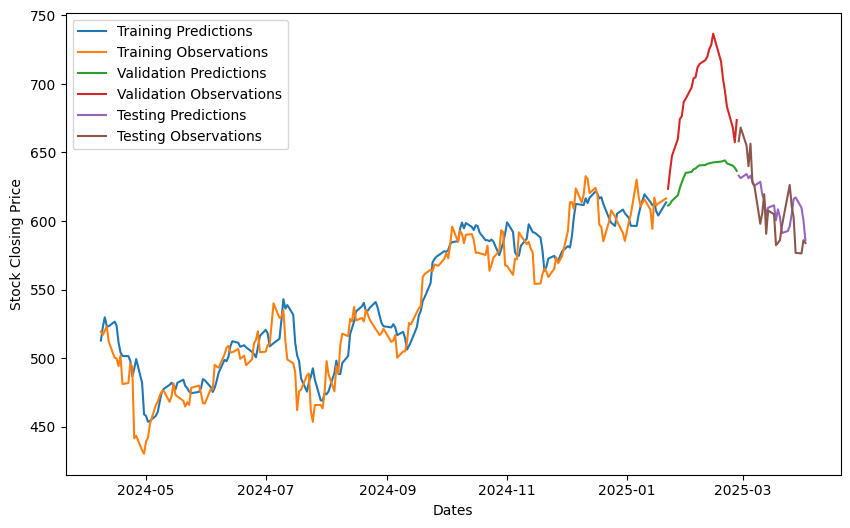

In [32]:
plt.figure(figsize = (10,6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xlabel('Dates')
plt.ylabel('Stock Closing Price')
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])